<a href="https://colab.research.google.com/github/MalVaroTor/MalVaroTor/blob/main/FA%C3%87A_VOC%C3%8A_MESMO_AULA_PR%C3%81TICA_SE%C3%87%C3%83O_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAÇA VOCÊ MESMO - AULA PRÁTICA SEÇÃO 10

In [ ]:
# IMPORTAÇÕES DOS PACOTES
from pandas.core.internals import base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import statistics as sts

# IMPORTAÇÕES DA BASE DE DADOS
base_de_dados = pd.read_csv("/content/drive/MyDrive/Arquivos Curso Cientista de Dados/10.Prática em Python/dados/tempo.csv")
bd = base_de_dados
display(bd)

,Aparencia;Temperatura;Umidade;Vento;Jogar
0,sol;85;85;FALSO;nao
1,sol;80;90;VERDADEIRO;nao
2,nublado;83;86;FALSO;sim
3,chuva;70;;FALSO;sim
4,chuva;68;80;FALSO;sim
5,chuva;65;70;VERDADEIRO;nao
6,menos;64;65;VERDADEIRO;sim
7,sol;1220;95;FALSO;nao
8,sol;69;70;FALSO;sim
9,chuva;75;200;;sim


---
A BASE DE DADOS NÃO ESTÁ DE FORMA TABELADA CORRETAMENTE. TEM QUE ORGANIZÁ-LA.

---

In [ ]:
# ORGANIZAÇÃO DA TABELA
bd = pd.read_csv("/content/drive/MyDrive/Arquivos Curso Cientista de Dados/10.Prática em Python/dados/tempo.csv", sep=";")
display(bd)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


---
A TABELA FOI ORGANIZADA DEVIDAMENTE.

---

In [ ]:
# ORGANIZAR/MUDAR OS NOMES DAS COLUNAS
bd.columns = ["Clima", "Temperatura [°F]", "Umidade [kg/m³]", "Vento", "Jogar"]
display(bd)

,Clima,Temperatura [°F],Umidade [kg/m³],Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


---
PERCEBE-SE QUE OS TÍTULOS DAS COLUNAS FORAM ATUALIZADOS.

---

In [ ]:
# EXCLUIR A COLUNA "VENTO"
bd = bd[["Clima", "Temperatura [°F]", "Umidade [kg/m³]", "Jogar"]]
display(bd)

,Clima,Temperatura [°F],Umidade [kg/m³],Jogar
0,sol,85,85.0,nao
1,sol,80,90.0,nao
2,nublado,83,86.0,sim
3,chuva,70,NaN,sim
4,chuva,68,80.0,sim
5,chuva,65,70.0,nao
6,menos,64,65.0,sim
7,sol,1220,95.0,nao
8,sol,69,70.0,sim
9,chuva,75,200.0,sim


---
A COLUNA "VENTO" FOI EXCLUÍDA COM SUCESSO.

---

In [ ]:
# VERIFICAÇÃO DE DADOS ERRÔNIOS
total = bd.groupby("Clima").size()
display(total)

total = bd.groupby("Temperatura [°F]").size()
display(total)

total = bd.groupby("Umidade [kg/m³]").size()
display(total)

total = bd.groupby("Jogar").size()
display(total)

# VERIFICAÇÃO DOS DADOS "NÃO DISPONÍVEIS"
#bd.isnull().sum()
display(bd.isnull().sum())

Clima
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Temperatura [°F]
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

Umidade [kg/m³]
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

Jogar
nao    5
sim    9
dtype: int64

Clima               0
Temperatura [°F]    0
Umidade [kg/m³]     1
Jogar               0
dtype: int64

---
A COLUNA "Jogar" ESTÁ OK, AS DEMAIS TEM QUE ARRUMAR. A COLUNA "Umidade [kg/m³]" HÁ UM DADOS NÃO DISPONÍVEL.

---

In [ ]:
# PARA COMEÇAR NOSSA ANÁLISE DOS DADOS PARA TRATAR OS DADOS, VAMOS OBSERVÁ-LOS.
bd["Temperatura [°F]"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura [°F], dtype: float64

In [ ]:
bd["Umidade [kg/m³]"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade [kg/m³], dtype: float64

--- 
PELA ANÁLISE DA COLUNA DE "Temperatura [°F]", OS DADOS NUMÉRICOS RODEIAM PELA MARGEM DOS 64 A 80°F, ISSO É EVIDENCIADO PELO 1°, 2° E 3° QUARTIS. A MÉDIDA DE 155.57 É PELO FATO DO DADO DE 1220°F, QUE É UM DADO ERRÔNIO, COMO PODE PERCEBER.

---
JÁ A COLUNA "Umidade [kg/m³]", OS DADOS RODEIAM PELA MARGEM DOS 65 AO 90 kg/m³, O QUE É EVIDENCIADO TAMBÉM PELOS 1°, 2° E 3° QUARTIS. O DADO DE 200 kg/m³ TAMBÉM É VISTO COMO ERRÔNIO.

---

In [ ]:
# VAMOS SUBSTITUIR O VALOR O DADO "MENOS" DA COLUNA CLIMA POR UMA DAS MODAS (CHUVA OU SOL).
# VAMOS SUBSTITUIR POR "SOL".
bd.loc[bd["Clima"] == "menos", "Clima"] = "sol"
total = bd.groupby("Clima").size()
display(total)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Clima
chuva      5
nublado    3
sol        6
dtype: int64

---
PERCEBEMOS QUE O DADO "menos" FOI SUBSTITUÍDO CORRETAMENTE PELO DADO "sol".

---



In [ ]:
# AGORA VAMOS SUBSTITUIR O VALOR 1220°F DA COLUNA TEMPERATURA PELA MEDIANA DAS TEMPERATURAS (A MEDIANA NOS TRAZ
# O VALOR QUE FAZ COM QUE A QUANTIDADE DE VALORES ABAIXO DELA SEJA IGUAL AOS DE CIMA. JÁ A 
# MÉDIA TRAZ O VALOR MÉDIO DE TODOS OS DADOS DE UM CONJUNTO)
mediana = sts.median(bd["Temperatura [°F]"])
print(mediana)

bd.loc[bd["Temperatura [°F]"] == 1220, "Temperatura [°F]"] = mediana
total = bd.groupby("Temperatura [°F]").size()
display(total)

73.5


Temperatura [°F]
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

---
PERCEBEMOS QUE O DADO "1220°F" FOI SUBSTITUÍDO CORRETAMENTE PELO MEDIANA "73,5°F".

---


In [ ]:
# AGORA VAMOS SUBSTITUIR O VALOR 200 E O VALOR NÃO DISPONÍVEL DA COLUNA UMIDADE 
# PELA SUA MEDIANA.
mediana = sts.median(bd["Umidade [kg/m³]"])
print(mediana)

# SUBSTITUIINDO O VALOR 200 PELA SUA MEDIANA.
bd.loc[bd["Umidade [kg/m³]"] == 200, "Umidade [kg/m³]"] = mediana

# SUBSTITUIR O VALOR NÃO DISPONÍVEL PELA SUA MEDIANA.
bd["Umidade [kg/m³]"].fillna(mediana, inplace=True)


total = bd.groupby("Umidade [kg/m³]").size()
display(total)

85.5


Umidade [kg/m³]
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    2
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

---
PERCEBEMOS QUE O DADO "200.0" E O "NaN" FORAM SUBSTITUÍDOS CORRETAMENTE PELO MEDIANA "85.25". ESTE VALOR ESTÁ SENDO ARREDONDADO PARA 85.5.

---

In [ ]:
display(bd)

total = bd.groupby("Clima").size()
display(total)

total = bd.groupby("Temperatura [°F]").size()
display(total)

total = bd.groupby("Umidade [kg/m³]").size()
display(total)

total = bd.groupby("Jogar").size()
display(total)

display(bd.isnull().sum())

,Clima,Temperatura [°F],Umidade [kg/m³],Jogar
0,sol,85.0,85.0,nao
1,sol,80.0,90.0,nao
2,nublado,83.0,86.0,sim
3,chuva,70.0,85.5,sim
4,chuva,68.0,80.0,sim
5,chuva,65.0,70.0,nao
6,sol,64.0,65.0,sim
7,sol,73.5,95.0,nao
8,sol,69.0,70.0,sim
9,chuva,75.0,85.5,sim


Clima
chuva      5
nublado    3
sol        6
dtype: int64

Temperatura [°F]
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

Umidade [kg/m³]
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    2
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

Jogar
nao    5
sim    9
dtype: int64

Clima               0
Temperatura [°F]    0
Umidade [kg/m³]     0
Jogar               0
dtype: int64

---
PODE-SE PERCEBER QUE A TABELA FOI TRATADA ADEQUANDAMENTE. OS DADOS ESTÃO DENTRO DO DOMÍNIO DESEJADO, SEM OUTLINES E VALORES NÃO DISCPONÍVEIS.

---

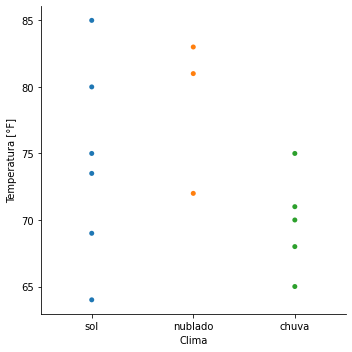

In [ ]:
# AGORA SERÁ GERADO GRÁFICOS APENAS PARA FIM DE ANÁLISE DOS DADOS
srn.catplot(x = "Clima", y = "Temperatura [°F]", data = bd, jitter = False)

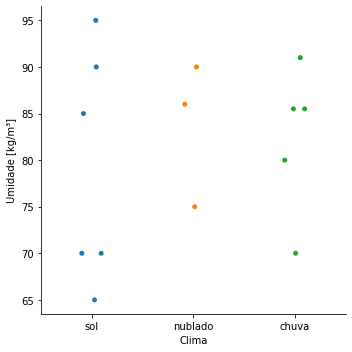

In [ ]:
srn.catplot(x = "Clima", y = "Umidade [kg/m³]", data = bd, jitter = True)

---
AO ANALISAR O GRÁFICO DE DISPERSÃO DA TEMPERATURA COM O CLIMA, PODEMOS PERCEBER QUE O CLIMA SOL POSSUI UMA VARIEDADE MAIS HOMOGÊNIA, ENQUANTO COM O NUBLADO É UM POUCO MAIS ALTO E COM O DE CHUVA A TEMPERATURA É MAIS AMENOS. O QUE PODE SER DEDUZIDO, PORQUE OS DIAS COM CHUVAS SÃO MAIS FRIOS E NUBLADOS FICAM MAIS QUENTES (MORMAÇOS).
PARA O GRÁFICO DE DISPERSÃO DA HUMIDADE COM O CLIMA, O DE SOL POSSUI UMA VARIEDADE COM MENORES E MAIORES HUMIDADES, O NUBLADO POSSUI MAIORES HUMIDADES E , CLARAMENTE, O DE CHUVA POSSUI VALORES MAIS ALTOS TAMBÉM. 

O GRÁFICO NOS TRAZ UMA IDEIA LÓGICA DO COMPORTAMENTO DE UM LOCAL TRADICIONAL EM DIAS DE SOL, NUBLADO E COM CHUVA, TRAZENDO UMA ANÁLISE QUE CONDIZ COM UMA POSSÍVEL REALIDADE.

---